**Player Rank Predictor Based on Game Performance:**
- The goal of this model is to predict a player's rank based on their performance in a game.
- The label of this dataset (i.e. what we are trying to predict) is rank.
- The features (i.e. the variables considered/used to predict our label) is: the player's summoner level, the number of wins and losses, win rate, average kills, deaths, and assists, the player's preferred lane, performance in the jungle, the number of camps killed, minions killed, gold earned, turret takedowns, vision score, dragon kills, and the longest time spent alive during a match, total damage dealt, total damage taken, along with the average game duration and the player's typical game start time.
- This a supervised classification problem: the various models I intend to test for best performance are - Logistic Regression, Random Forest, and Gradient Boosting DT.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/emmyson11/LoL-RankPredictor/refs/heads/main/LeaguePlayerStats.csv")

In [3]:
df.head()

,summonerName,summonerLevel,rank,wins,losses,winRate,kills,deaths,assists,prefLane,...,minionsKilled,goldEarned,turretTakedowns,visionScore,dragonKills,longestTimeSpentLiving,totalDamageDealt,totalDamageTaken,gameDuration,gameStart
0,RoséPosié,712,BRONZE,13,12,0.52,3.20,6.72,15.36,SUPPORT,...,50.32,8982.20,1,45.56,0,506.96,48651.12,544240,28.566667,7.216000
1,Xest,199,BRONZE,12,13,0.48,8.36,5.72,14.44,SUPPORT,...,47.40,11866.56,0,29.96,0,494.00,78143.68,441284,24.580667,16.400000
2,SilverHawk0,340,BRONZE,11,14,0.44,8.20,9.00,7.88,TOP,...,186.16,13236.60,1,19.96,0,438.64,150665.56,743065,30.250667,16.724667
3,Res93,61,BRONZE,12,13,0.48,8.60,7.52,8.20,ADC,...,190.00,13367.08,2,25.36,0,558.36,170517.52,594545,30.931333,17.265333
4,B3tterTh4nYo0,124,BRONZE,8,17,0.32,5.24,7.32,8.76,JUNGLE,...,97.76,11655.24,0,21.28,0,563.40,152541.04,652545,29.800000,13.505333


In [4]:
df.shape

(2285, 21)

In [5]:
df.dtypes

summonerName               object
summonerLevel               int64
rank                       object
wins                        int64
losses                      int64
winRate                   float64
kills                     float64
deaths                    float64
assists                   float64
prefLane                   object
campsKilled               float64
minionsKilled             float64
goldEarned                float64
turretTakedowns             int64
visionScore               float64
dragonKills                 int64
longestTimeSpentLiving    float64
totalDamageDealt          float64
totalDamageTaken            int64
gameDuration              float64
gameStart                 float64
dtype: object

In [6]:
df.describe()

,summonerLevel,wins,losses,winRate,kills,deaths,assists,campsKilled,minionsKilled,goldEarned,turretTakedowns,visionScore,dragonKills,longestTimeSpentLiving,totalDamageDealt,totalDamageTaken,gameDuration,gameStart
count,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2285.000000,2285.000000
mean,397.775055,12.773742,12.200875,0.511553,6.736992,6.602602,8.988009,27.068491,114.281915,12068.454345,1.457330,22.834383,0.102407,525.862548,135230.686408,6.579966e+05,27.859433,15.286140
std,264.024415,3.072962,3.078426,0.122531,2.370627,1.570894,3.757180,38.655790,57.981056,1841.819902,0.744239,14.255612,0.332188,107.862196,51438.305929,1.554706e+05,2.660673,2.885436
min,29.000000,0.000000,2.000000,0.000000,0.000000,1.800000,0.320000,0.000000,0.240000,3464.400000,0.000000,0.000000,0.000000,195.760000,9671.600000,1.179100e+05,13.546000,3.696667
25%,196.000000,11.000000,10.000000,0.440000,5.280000,5.560000,6.360000,3.520000,60.840000,11032.240000,1.000000,14.000000,0.000000,459.480000,103381.280000,5.443930e+05,26.195333,13.732000
50%,354.000000,13.000000,12.000000,0.520000,6.720000,6.480000,8.000000,9.240000,113.640000,12231.400000,1.000000,18.800000,0.000000,527.960000,138053.120000,6.561850e+05,28.007333,15.729333
75%,554.000000,15.000000,14.000000,0.600000,8.240000,7.600000,10.800000,31.280000,164.240000,13269.480000,2.000000,26.440000,0.000000,601.920000,167582.040000,7.629430e+05,29.697333,17.285333
max,1755.000000,22.000000,25.000000,0.880000,15.440000,13.520000,31.680000,187.440000,248.920000,17637.840000,4.000000,90.720000,2.000000,864.440000,324115.160000,1.345198e+06,35.542667,22.054667


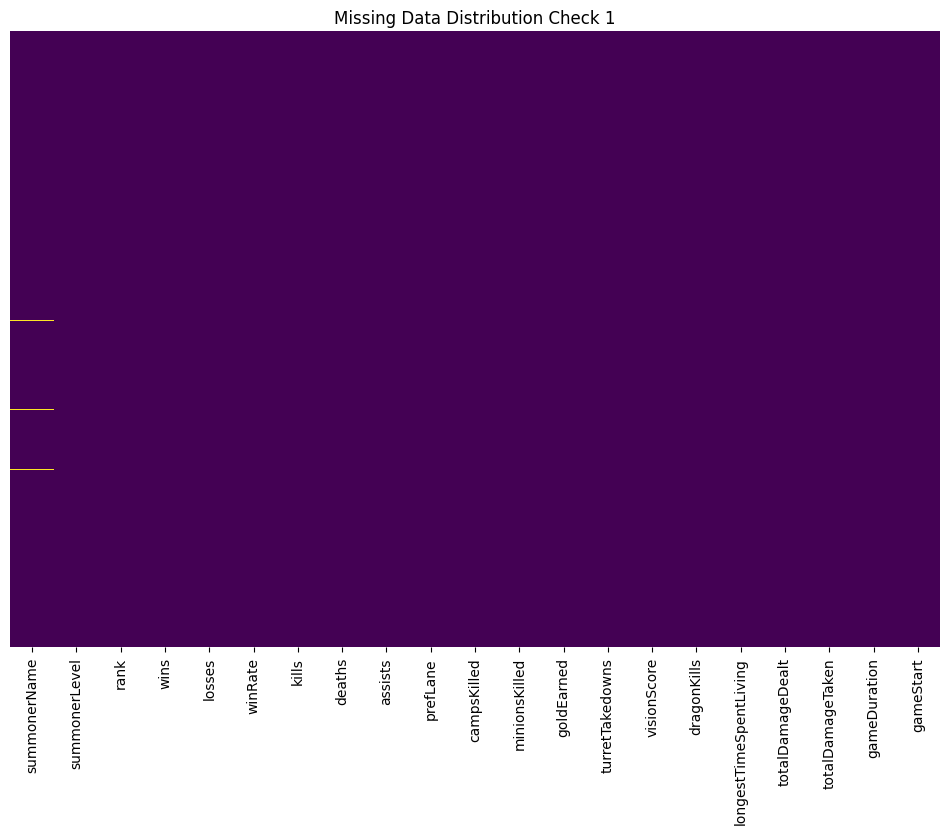

In [7]:
# Created a heatmap to visualize the missing data distribution on dataset
missing_check1 = df.isnull()

plt.figure(figsize = (12, 8))
sns.heatmap(missing_check1, cbar=False, cmap='viridis', yticklabels=False, xticklabels=True)

plt.title('Missing Data Distribution Check 1')
plt.show()

In [8]:
# From the plot above, we see that the dataset has mostly filled in data besides a few missing summoner names
df['summonerName'].dtype

dtype('O')

In [9]:
# Display all of the float columns in the dataset
float_col = df.select_dtypes(include = ['float64']).columns.tolist()
float_col

['winRate',
 'kills',
 'deaths',
 'assists',
 'campsKilled',
 'minionsKilled',
 'goldEarned',
 'visionScore',
 'longestTimeSpentLiving',
 'totalDamageDealt',
 'gameDuration',
 'gameStart']

In [10]:
# Display all of the object columns in the dataframe
obj_col = df.select_dtypes(include = ['object']).columns.tolist()
obj_col

['summonerName', 'rank', 'prefLane']

In [11]:
# There are 3 columns we have to impute: 'summonerName', 'rank', 'prefLane'
obj_nunique_count = df[obj_col].nunique()
obj_nunique_count

summonerName    2023
rank               8
prefLane           6
dtype: int64

In [12]:
# Because 'summonerName' is a unique identifier of players, might not be relevant to modeling (adds noise), opt to drop this column
df.drop(columns = ['summonerName'], axis = 1, inplace = True)

In [13]:
# Verify the shape in the columns dimension decreased by 1
df.shape

(2285, 20)

In [14]:
# View what the unique values in 'rank' and 'prefLane' are:
unique_rank = df['rank'].unique().tolist()
unique_prefLane = df['prefLane'].unique().tolist()
print(f'unique rank values: {unique_rank}')
print(f'unique prefLane values: {unique_prefLane}')

unique rank values: ['BRONZE', 'DIAMOND', 'EMERALD', 'GOLD', 'IRON', 'MASTER', 'PLATINUM', 'SILVER']
unique prefLane values: ['SUPPORT', 'TOP', 'ADC', 'JUNGLE', 'NONE', 'MIDDLE']


In [15]:
# In the rank column, there is a hierarchial order: iron < bronze < silver < gold < platinum < emerald < diamond < master
# Reinterpret each rank as a number respective to this order
rank_order = {
    'IRON': 0,
    'BRONZE': 1,
    'SILVER': 2,
    'GOLD': 3,
    'PLATINUM': 4,
    'EMERALD': 5,
    'DIAMOND': 6,
    'MASTER': 7
}

df['rank_encoded'] = df['rank'].map(rank_order)
df.drop(columns = ['rank'], axis = 1, inplace = True)

In [16]:
# In the prefLane column, no hierarchial order, opt to implement one-hot encoding to transform this columns
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False)

fitted = enc.fit_transform(df[['prefLane']])

df_enc = pd.DataFrame(data=fitted, columns=enc.get_feature_names_out(['prefLane']))

df = pd.concat([df, df_enc], axis=1)


In [17]:
df.head()

,summonerLevel,wins,losses,winRate,kills,deaths,assists,prefLane,campsKilled,minionsKilled,...,totalDamageTaken,gameDuration,gameStart,rank_encoded,prefLane_ADC,prefLane_JUNGLE,prefLane_MIDDLE,prefLane_NONE,prefLane_SUPPORT,prefLane_TOP
0,712,13,12,0.52,3.20,6.72,15.36,SUPPORT,0.80,50.32,...,544240,28.566667,7.216000,1,0.0,0.0,0.0,0.0,1.0,0.0
1,199,12,13,0.48,8.36,5.72,14.44,SUPPORT,1.72,47.40,...,441284,24.580667,16.400000,1,0.0,0.0,0.0,0.0,1.0,0.0
2,340,11,14,0.44,8.20,9.00,7.88,TOP,5.16,186.16,...,743065,30.250667,16.724667,1,0.0,0.0,0.0,0.0,0.0,1.0
3,61,12,13,0.48,8.60,7.52,8.20,ADC,9.36,190.00,...,594545,30.931333,17.265333,1,1.0,0.0,0.0,0.0,0.0,0.0
4,124,8,17,0.32,5.24,7.32,8.76,JUNGLE,53.56,97.76,...,652545,29.800000,13.505333,1,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
df.drop(columns = ['prefLane'], axis = 1, inplace = True)
df.shape

(2285, 25)

In [19]:
# Verify all object columns in dataframe is handled (should see 0 columns if done correctly)
df.select_dtypes(include = ['object'])

""
0
1
2
3
4
...
2280
2281
2282
2283


In [20]:
# Create derived features

# Calculate KDA for each player
df['KDA'] = (df['kills'] + df['assists']) / df['deaths']

# Calculate Gold per Minute for each player
df['Gold_per_Minute'] = df['goldEarned'] / df['gameDuration']

# Calculate Camps Killed per Minute for each player
df['Camps_Killed_per_Minute'] = df['campsKilled'] / df['gameDuration']

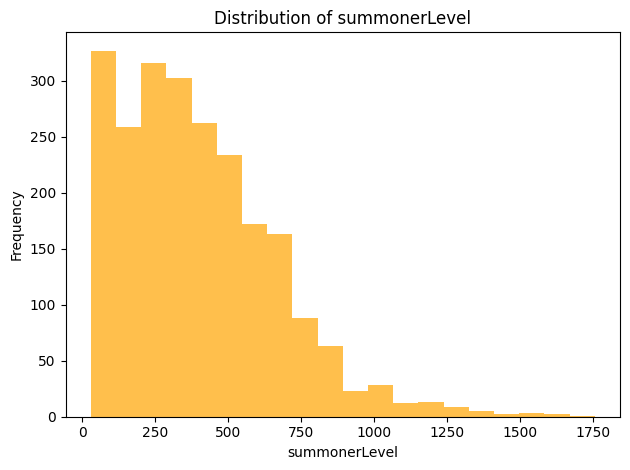

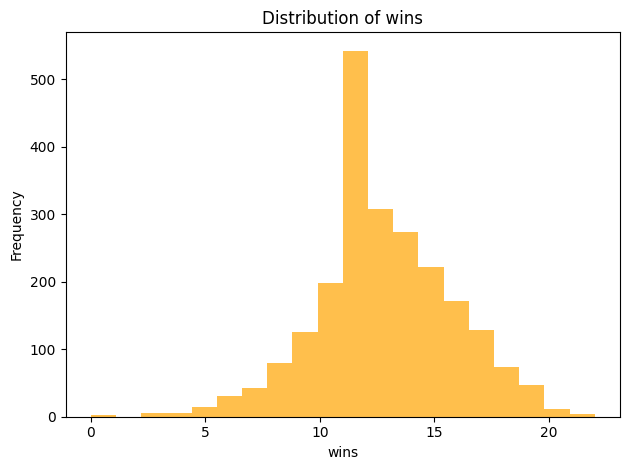

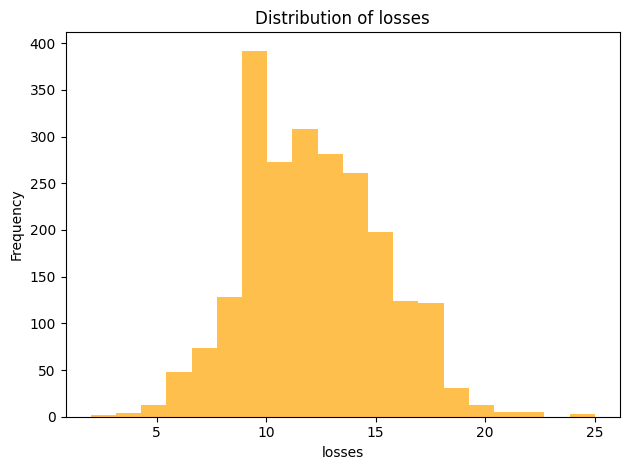

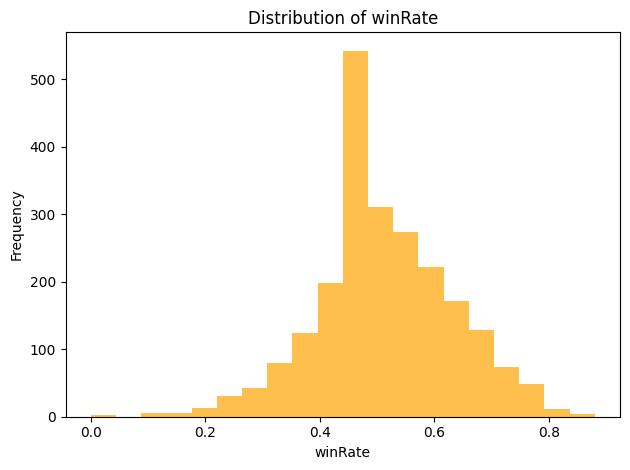

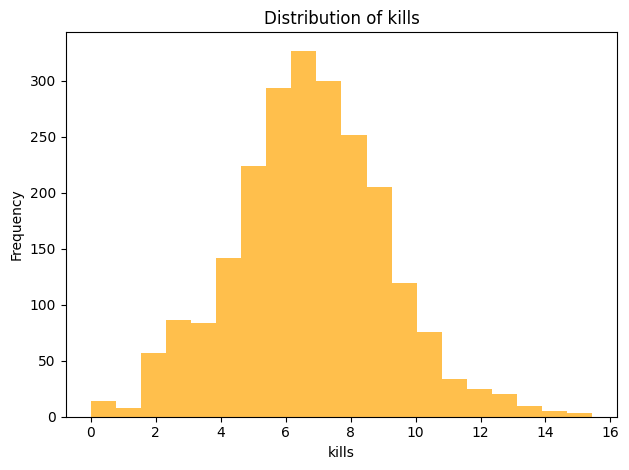

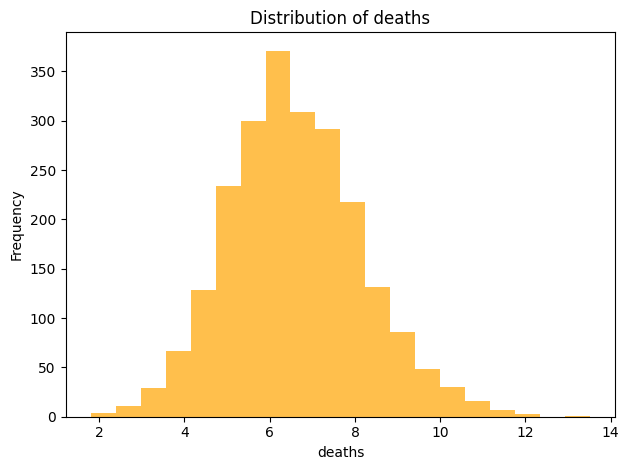

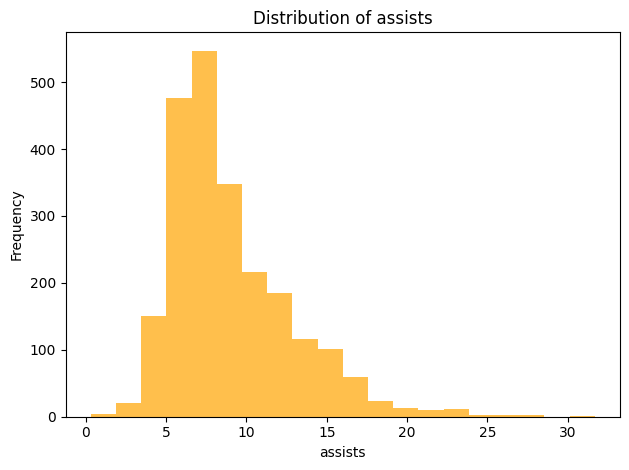

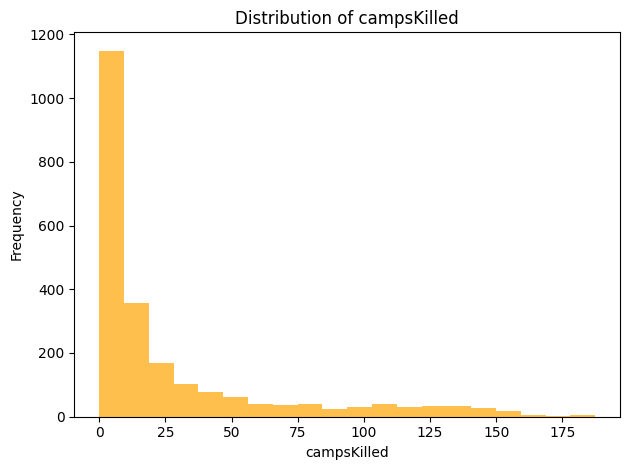

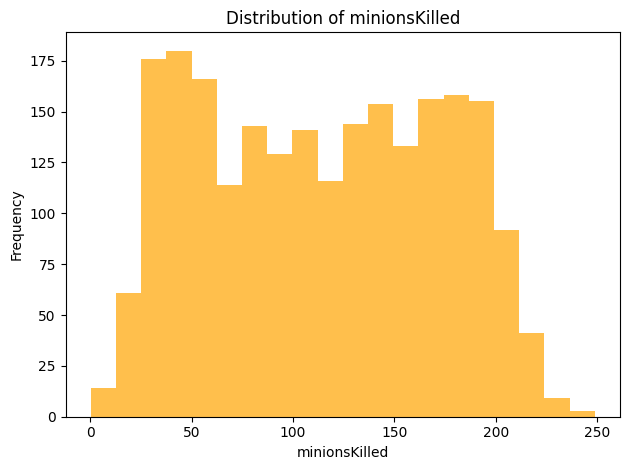

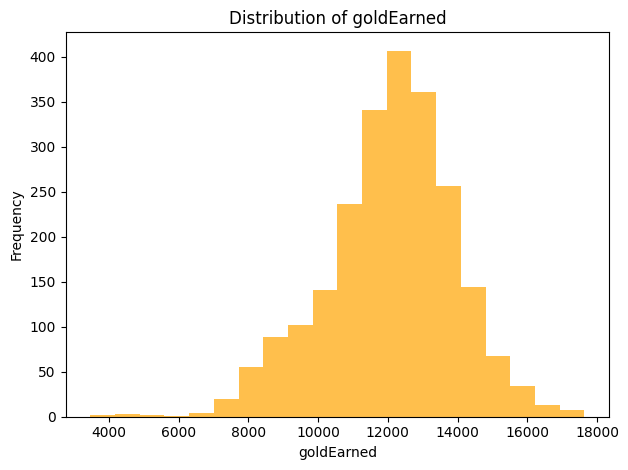

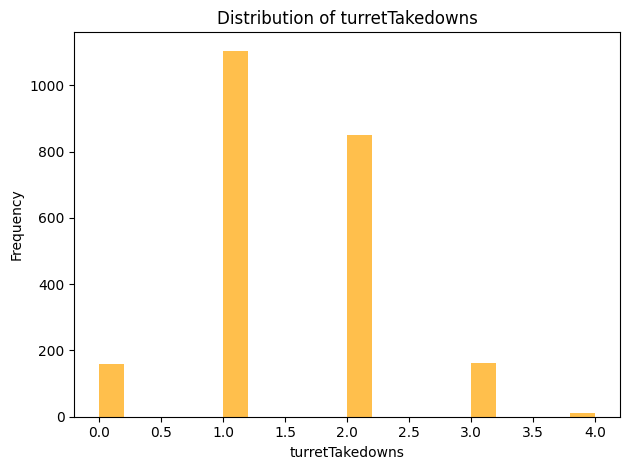

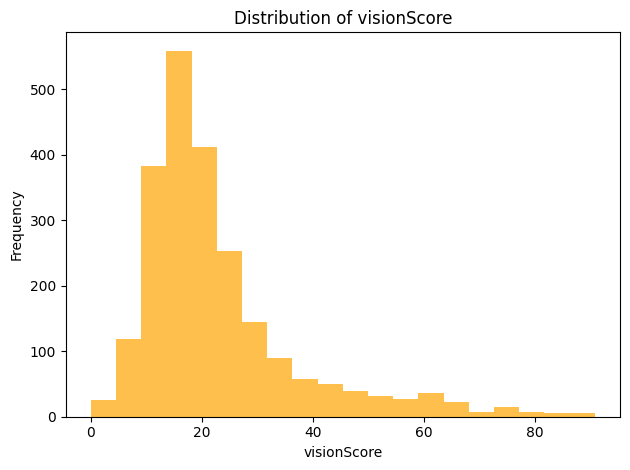

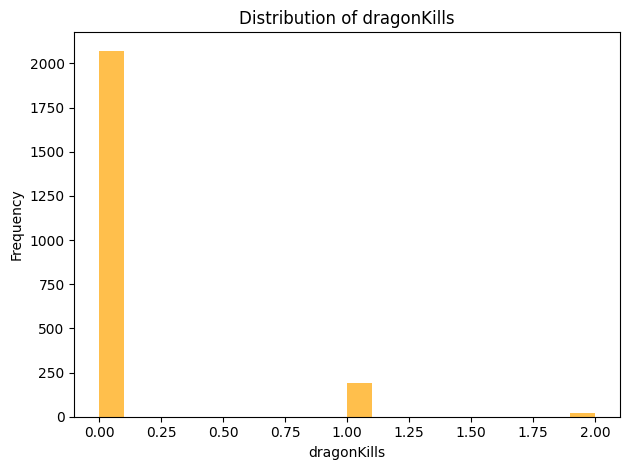

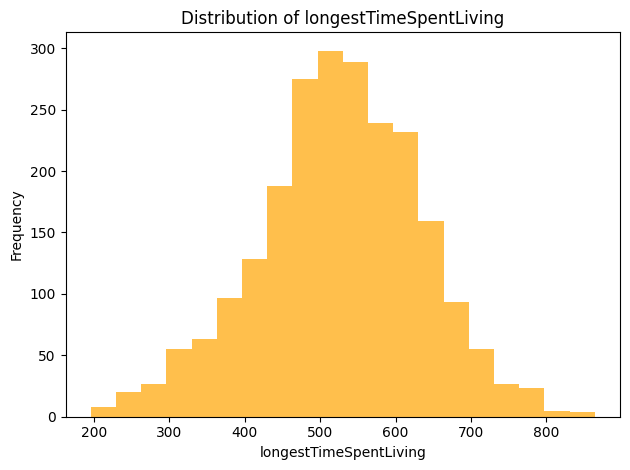

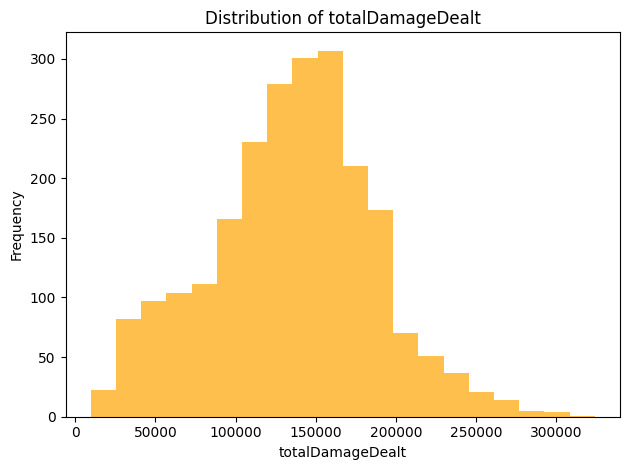

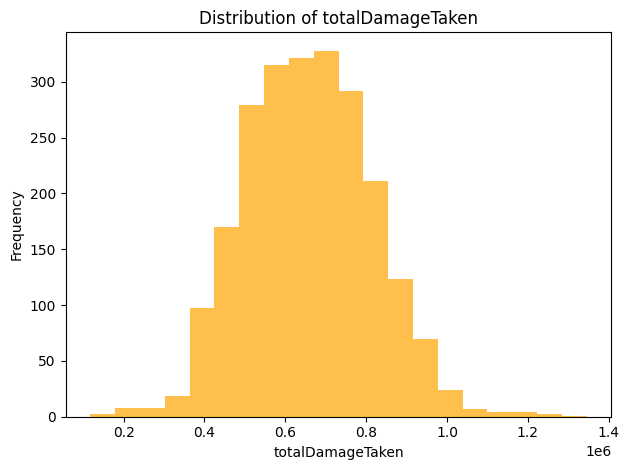

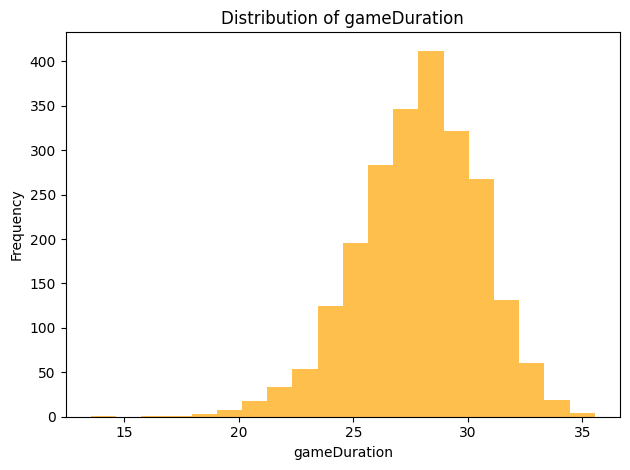

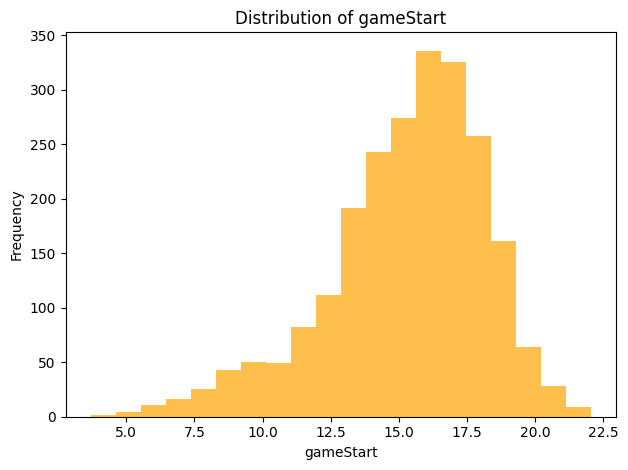

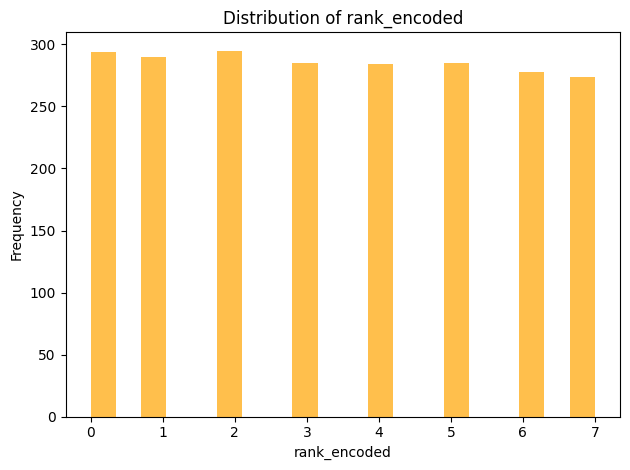

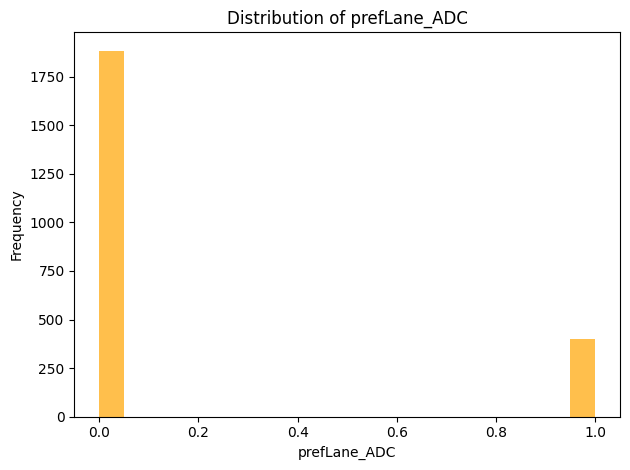

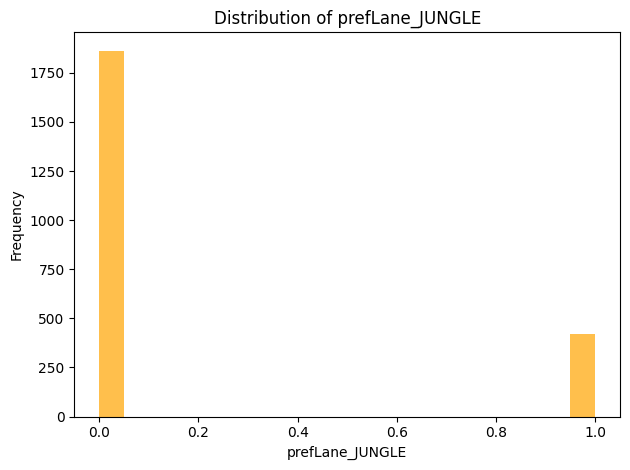

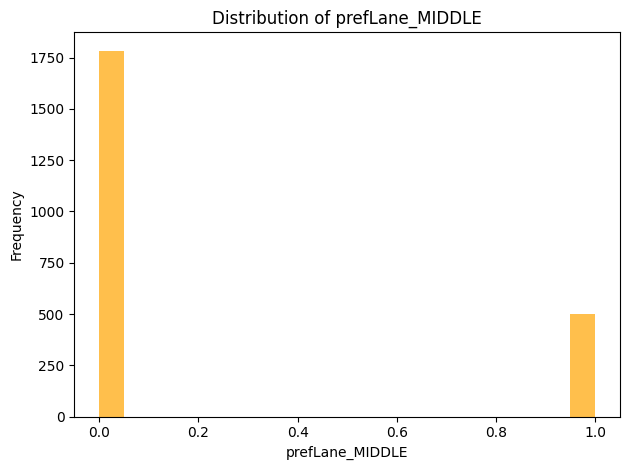

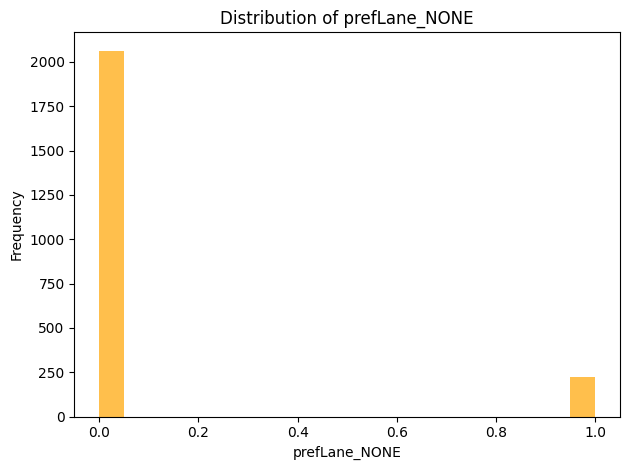

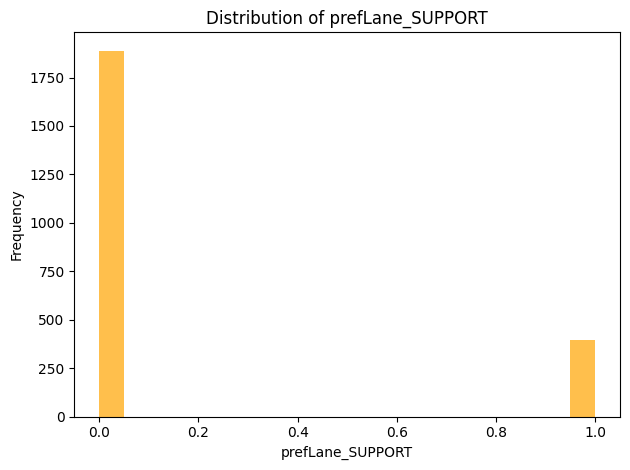

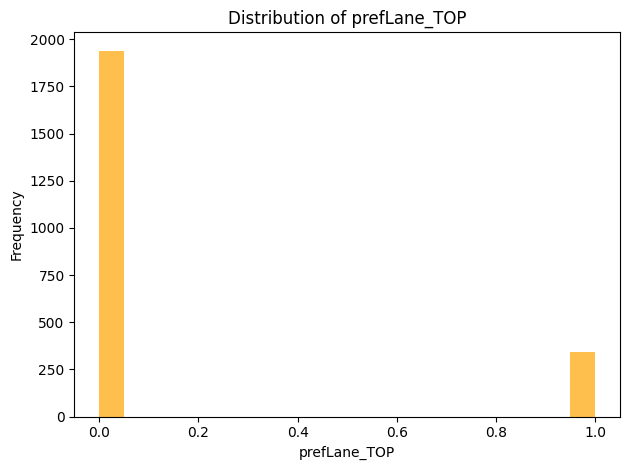

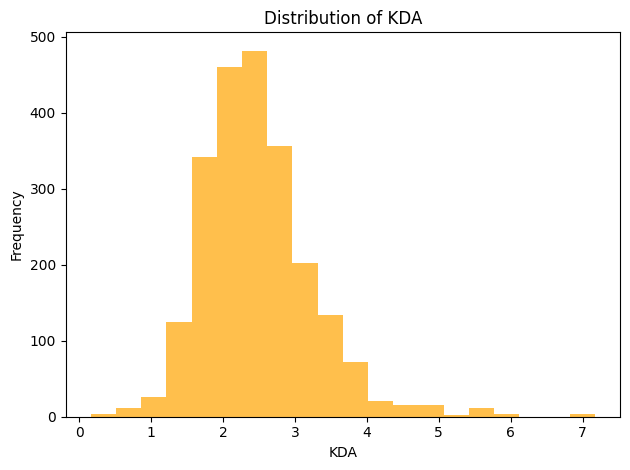

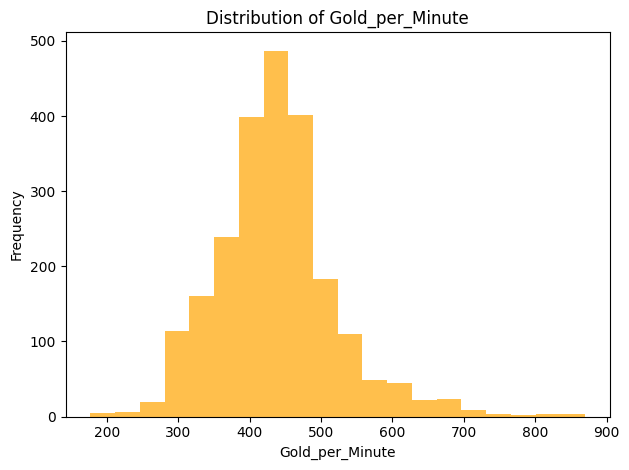

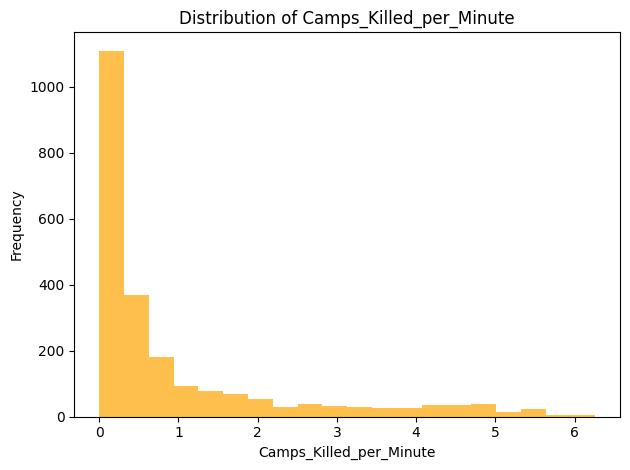

In [21]:
# Iterate over each column in the DataFrame
for col in df.columns:
        df[col].plot(kind='hist', bins=20, color='orange', alpha=0.7)
        plt.title(f'Distribution of {col}')
        plt.xlabel(f'{col}')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

In [22]:
# Handle outliers:
from scipy import stats

# Calculate Z-scores for the numerical columns
z_scores = stats.zscore(df)

z_scores_df = pd.DataFrame(z_scores, columns=df.columns)

threshold = 3

outliers = (z_scores_df.abs() > threshold)

outliers_df = df[outliers.any(axis=1)]

# Print the rows with outliers
outliers_df.head()

,summonerLevel,wins,losses,winRate,kills,deaths,assists,campsKilled,minionsKilled,goldEarned,...,rank_encoded,prefLane_ADC,prefLane_JUNGLE,prefLane_MIDDLE,prefLane_NONE,prefLane_SUPPORT,prefLane_TOP,KDA,Gold_per_Minute,Camps_Killed_per_Minute
6,508,14,11,0.560000,6.000000,7.120000,6.000000,24.000000,69.560000,13705.040000,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.685393,589.734645,1.032732
8,139,12,13,0.480000,7.960000,11.760000,18.560000,0.240000,68.600000,12101.400000,...,1,0.0,0.0,0.0,1.0,0.0,0.0,2.255102,549.048728,0.010889
11,30,7,2,0.777778,10.888889,6.111111,11.111111,32.333333,176.666667,15715.555556,...,1,0.0,0.0,1.0,0.0,0.0,0.0,3.600000,484.854025,0.997543
15,332,17,8,0.680000,6.640000,6.360000,10.040000,5.440000,78.680000,16141.480000,...,1,0.0,0.0,0.0,1.0,0.0,0.0,2.622642,687.476078,0.231693
18,296,13,12,0.520000,5.200000,7.440000,7.800000,47.760000,36.600000,13657.280000,...,1,0.0,0.0,0.0,1.0,0.0,0.0,1.747312,578.469532,2.022929


In [23]:
outliers_df.shape

(449, 28)

In [24]:
df.shape

(2285, 28)

**Data Cleaning and Preprocessing Methodlogy**
- I started by cleaning all of the missing data. Fortunately, only the summonerName column had missing data and we didn't need that columns so I just dropped it.
- Next, I started to transform all of the object columns by one-hot-encoding or mapping the values to a numerical representation
- Then, I standardized the dataset since there are various columns on different scales/metrics.
- Finally, I removed outliers by winsorzing. Since outliers could indicate high performing players (especially for higher ranks like diamond/masters) it is better to retain this information.
- Decided to add new columns to the dataframe: KDA ratio, camps killed per minute, and gold per minute to provide more granular insight for the model.

In [25]:
# Create training, validation, and test sets: 60% training, 20% validation, 20% testing

# Step 1: Prepare the data
X = df.drop(columns=['rank_encoded'])  # Features
y = df['rank_encoded']  # Target label

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = MinMaxScaler()  # or MinMaxScaler() for normalization
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Implement random forest model:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

class_weights = {
    0: 1,   # IRON
    1: 1,   # BRONZE
    2: 1,   # SILVER
    3: 1,   # GOLD
    4: 1,   # PLATINUM
    5: 2,   # EMERALD (higher weight for underrepresented class)
    6: 3,   # DIAMOND (higher weight)
    7: 4    # MASTER (highest weight for underrepresented class)
}

# Step 1: Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, class_weight=class_weights)

# Step 2: Train the model
rf_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions
rf_y_pred = rf_model.predict(X_test_scaled)
rf_y_pred_prob = rf_model.predict_proba(X_test_scaled)

In [28]:
# Step 4: Evaluate the model using ROC, AUC
accuracy = accuracy_score(y_test, rf_y_pred)
conf_matrix = confusion_matrix(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print('\n')
print("Classification Report:")
print(class_report)

Accuracy: 0.4267
Confusion Matrix:
[[44  7  3  0  1  1  1  0]
 [10 16 13  5 10  2  3  0]
 [ 7  7 14  7 15  5  3  2]
 [ 7 15  9 13  8  5  3  2]
 [ 1  3  4  9 14 10  7  2]
 [ 0  3  6  5 10 14  9  1]
 [ 2  3  1  5  1 15 24 14]
 [ 0  0  0  0  0  0  0 56]]


Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69        57
           1       0.30      0.27      0.28        59
           2       0.28      0.23      0.25        60
           3       0.30      0.21      0.25        62
           4       0.24      0.28      0.26        50
           5       0.27      0.29      0.28        48
           6       0.48      0.37      0.42        65
           7       0.73      1.00      0.84        56

    accuracy                           0.43       457
   macro avg       0.40      0.43      0.41       457
weighted avg       0.40      0.43      0.41       457



**What the classification report tells you:**
1. Precision: Measures how many of the items predicted as positive (or belonging to a particular class) are actually positive.
2. Recall: Measures how many of the actual positive items (or the items of a particular class) were correctly identified.
3. F1-score: The harmonic mean of precision and recall, which provides a single score that balances both the precision and recall.

For multiclass classification, classification_report will provide the following metrics for each class:

- Precision
- Recall
- F1-score
- Support (the number of true instances of the class)

AUC Score: 0.8017


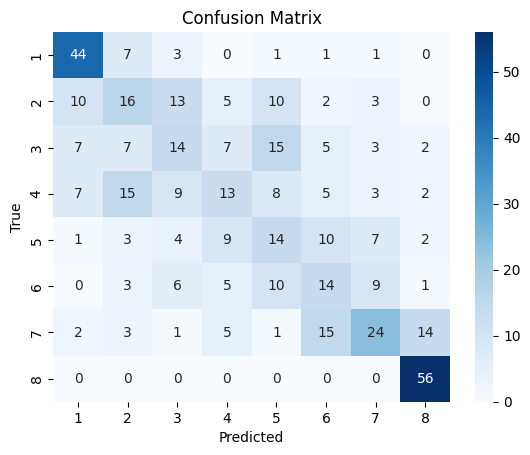

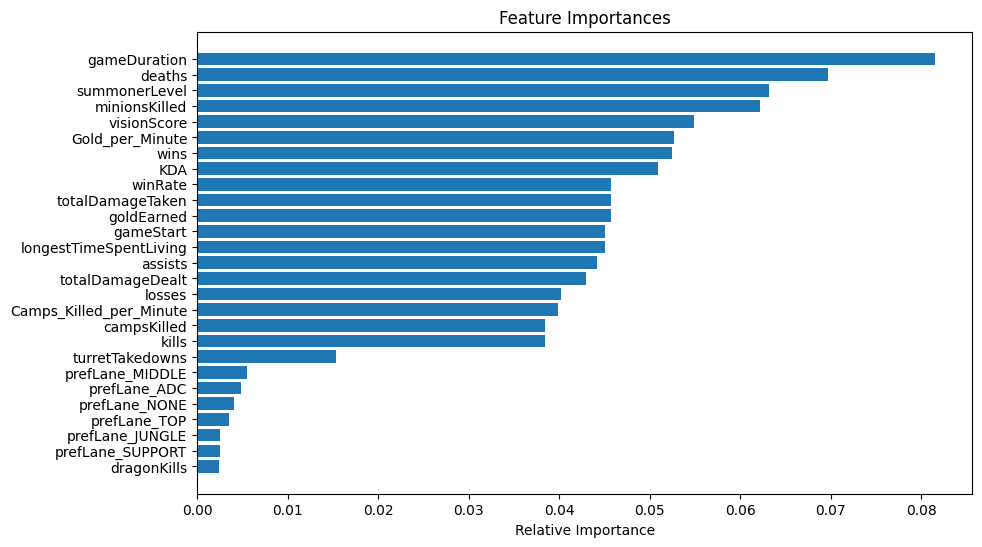

In [29]:
# Calculate AUC score (for multi-class classification, we will use the one-vs-rest approach)
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])  # Modify class list as per your data
roc_auc = roc_auc_score(y_test_binarized, rf_y_pred_prob, multi_class='ovr')

print(f"AUC Score: {roc_auc:.4f}")


# Step 2: Split the data into training and test sets
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optionally, plot the feature importances
importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Relative Importance")
plt.show()

Mean Squared Error: 1.715206354921704
R-squared: 0.6774160696039482


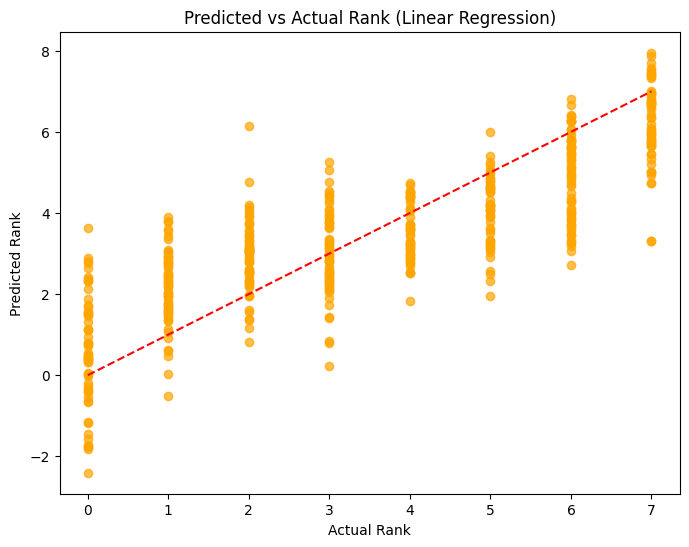

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 3: Instantiate and fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
lr_y_pred = lr_model.predict(X_test_scaled)

# Step 5: Evaluate the model
# Calculate mean squared error (MSE) and R-squared
mse = mean_squared_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Step 6: Plot the predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_y_pred, color='orange', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.title('Predicted vs Actual Rank (Linear Regression)')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.show()


Accuracy: 0.3939
Confusion Matrix:
[[41  6  8  1  0  0  1  0]
 [10 16 15  7  4  4  3  0]
 [ 4 11 11 18  8  5  2  1]
 [ 3 16 12 12  8  8  3  0]
 [ 2  5  4 16 11  9  3  0]
 [ 1  2  6  6 11 13  8  1]
 [ 0  2  6  5  4 18 21  9]
 [ 0  0  0  1  0  0  0 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.72      0.69        57
           1       0.28      0.27      0.27        59
           2       0.18      0.18      0.18        60
           3       0.18      0.19      0.19        62
           4       0.24      0.22      0.23        50
           5       0.23      0.27      0.25        48
           6       0.51      0.32      0.40        65
           7       0.83      0.98      0.90        56

    accuracy                           0.39       457
   macro avg       0.39      0.40      0.39       457
weighted avg       0.39      0.39      0.39       457

AUC Score (One-vs-Rest): 0.7948


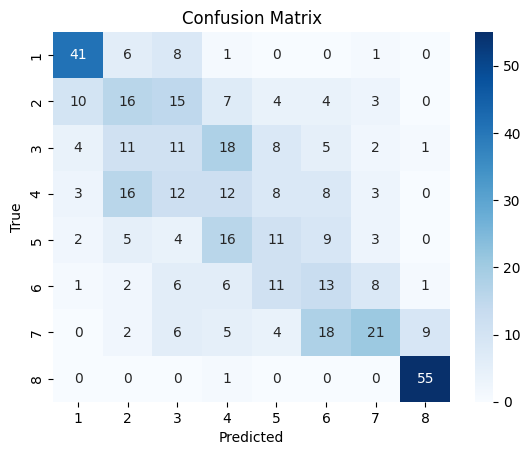

In [31]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=8, random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test_scaled)
xgb_y_pred_prob = xgb_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, xgb_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, xgb_y_pred)
print("Classification Report:")
print(class_report)

# AUC Score (One-vs-Rest approach)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])  # Modify class list as per your data
roc_auc = roc_auc_score(y_test_binarized, xgb_y_pred_prob, multi_class='ovr')
print(f"AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1,2,3,4,5,6,7,8], yticklabels=[1,2,3,4,5,6,7,8])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4063
[LightGBM] [Info] Number of data points in the train set: 1828, number of used features: 27
[LightGBM] [Info] Start training from score -2.042918
[LightGBM] [Info] Start training from score -2.068560
[LightGBM] [Info] Start training from score -2.051392
[LightGBM] [Info] Start training from score -2.103806
[LightGBM] [Info] Start training from score -2.055657
[LightGBM] [Info] Start training from score -2.042918
[LightGBM] [Info] Start training from score -2.149686
[LightGBM] [Info] Start training from score -2.126483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.4311
Confusion Matrix:
[[41  8  6  1  1  0  0  0]
 [ 8 21 13  7  5  4  1  0]
 [ 3  8 19 14 10  4  2  0]
 [ 2 14 16 14  4  9  3  0]
 [ 1  7  3 18 10  8  3  0]
 [ 0  2  5  7 10 16  7  1]
 [ 1  2 

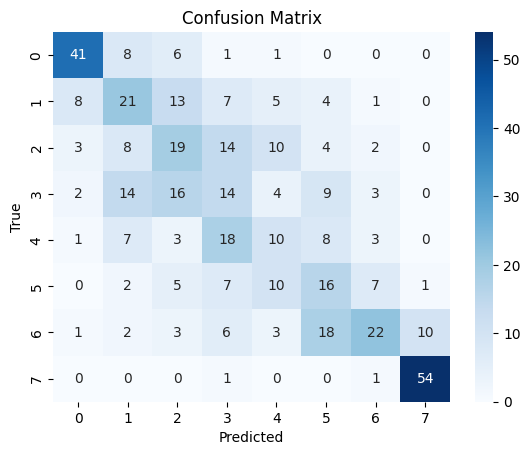

In [32]:
import lightgbm as lgb

# Initialize LightGBM model
lgb_model = lgb.LGBMClassifier(objective='multiclass', num_class=8, random_state=42)

# Train the model
lgb_model.fit(X_train_scaled, y_train)

# Make predictions
lgb_y_pred = lgb_model.predict(X_test_scaled)
lgb_y_pred_prob = lgb_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, lgb_y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, lgb_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, lgb_y_pred)
print("Classification Report:")
print(class_report)

# AUC Score (One-vs-Rest approach)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])
roc_auc = roc_auc_score(y_test_binarized, lgb_y_pred_prob, multi_class='ovr')
print(f"AUC Score (One-vs-Rest): {roc_auc:.4f}")

# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2,3,4,5,6,7], yticklabels=[0,1,2,3,4,5,6,7])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Conclusions:**
- Random Forest Classifier: ...
- Linear Regression: ...
- XGB Classifier: ...
- Light XBG Classifier: ...